# Ejemplo Regresión Lineal

Código seleccionado desde [Linear Regression in Python with Scikit-Learn](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('student_scores.csv')

In [5]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
df.shape

(25, 2)

<AxesSubplot:title={'center':'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

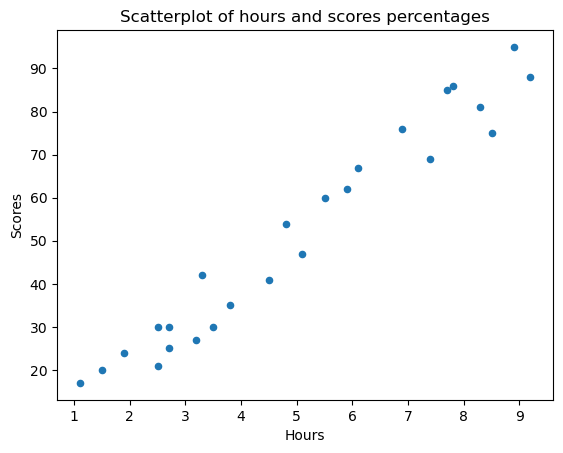

In [5]:
#plt.scatter(x=df['Hours'], y=df['Scores'])
#plt.title('Scatterplot of hours and scores percentages')

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

In [6]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [8]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [9]:
print('X shape:', X.shape)
print('X:', X)

X shape: (25, 1)
X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
print(df['Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['Hours'].values.shape) # (25,)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:
print(y_train)

[[25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]
 [67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]


In [13]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
regressor.intercept_

array([2.82689235])

In [15]:
regressor.coef_

array([[9.68207815]])

In [16]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [17]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[94.80663482]]


In [18]:
score = regressor.predict([[9.5]])
print(score)

[[94.80663482]]


In [19]:
y_pred = regressor.predict(X_test)

In [20]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [22]:
mae

3.9207511902099244

In [23]:
mse

18.943211722315272

In [24]:
rmse

4.352380006653288

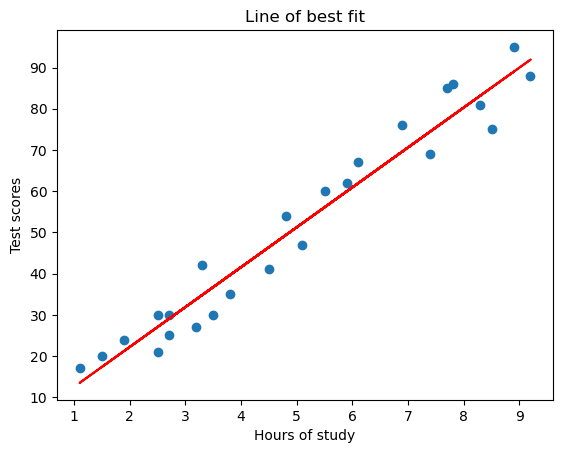

In [27]:
#Plot dataset
plt.scatter(X, y)
#Predict y values
pred = regressor.coef_ * X + regressor.intercept_
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()